<a href="https://colab.research.google.com/github/DikshantPatel2210/Titanic-Survival-Prediction/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data = pd.read_csv("/content/titanic (2).csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df = data.copy()

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df = df.drop(columns = "Cabin" )

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
df["Age"].fillna(df["Age"].mean() , inplace= True)

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [ ]:
df["Embarked"].fillna("S" , inplace = True)

In [ ]:
df["Embarked"].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [ ]:
df["Age"] = df["Age"].astype(int)

In [ ]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.544332,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 76.7+ KB


In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C


In [ ]:
df["Survived"].value_counts()  # almost balance

Survived
0    549
1    342
Name: count, dtype: int64

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C


In [ ]:
df['Fare'] = pd.cut(df['Fare'], bins=[0, 7.92, 31.00, float('inf')], labels=['Low', 'Medium', 'High'], right=False)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,Low,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,High,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,Medium,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,High,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,Medium,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,Medium,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,Medium,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,Medium,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,Medium,C


In [ ]:
df.loc[df["Fare"] <= 7.92 , "Fare"] = "Low"
df.loc[df["Fare"] >= 31.00 , "Fare"] = "High"
df.loc[(df["Fare"] > 7.92) & (df["Fare"] < 31.00), "Fare"] = "Medium"

TypeError: '>=' not supported between instances of 'str' and 'float'

In [ ]:
df["Fare"].value_counts()

Fare
Medium    443
High      225
Low       223
Name: count, dtype: int64

In [ ]:
df['Age'] = pd.cut(df['Age'], bins=[0, 18, 30, 50, float('inf')], labels=['Children', 'young_adult','Middle_adult', "Old_adult"], right=False)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,young_adult,1,0,A/5 21171,Low,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Middle_adult,1,0,PC 17599,High,C
2,3,1,3,"Heikkinen, Miss. Laina",female,young_adult,0,0,STON/O2. 3101282,Medium,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Middle_adult,1,0,113803,High,S
4,5,0,3,"Allen, Mr. William Henry",male,Middle_adult,0,0,373450,Medium,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,young_adult,0,0,211536,Medium,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,young_adult,0,0,112053,Medium,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,young_adult,1,2,W./C. 6607,Medium,S
889,890,1,1,"Behr, Mr. Karl Howell",male,young_adult,0,0,111369,Medium,C


In [ ]:
df.loc[df["Age"] <= 18 , "Age"] = 0
df.loc[df["Age"] > 50 , "Age"] = 3
df.loc[(df["Age"] > 18) & (df["Age"] < 30), "Age"] = 1
df.loc[(df["Age"] >= 30 ) & (df["Age"] <= 50), "Age"] = 2

In [ ]:
df["Age"].unique()


['young_adult', 'Middle_adult', 'Old_adult', 'Children']
Categories (4, object): ['Children' < 'young_adult' < 'Middle_adult' < 'Old_adult']

<ipython-input-508-5b4d66762cf3>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 2].set_xticklabels(new_labels)
<ipython-input-508-5b4d66762cf3>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 2].set_xticklabels(new_labels)


[Text(0, 0, 'Child'),
 Text(1, 0, 'Young'),
 Text(2, 0, 'Adult'),
 Text(3, 0, 'Senior')]

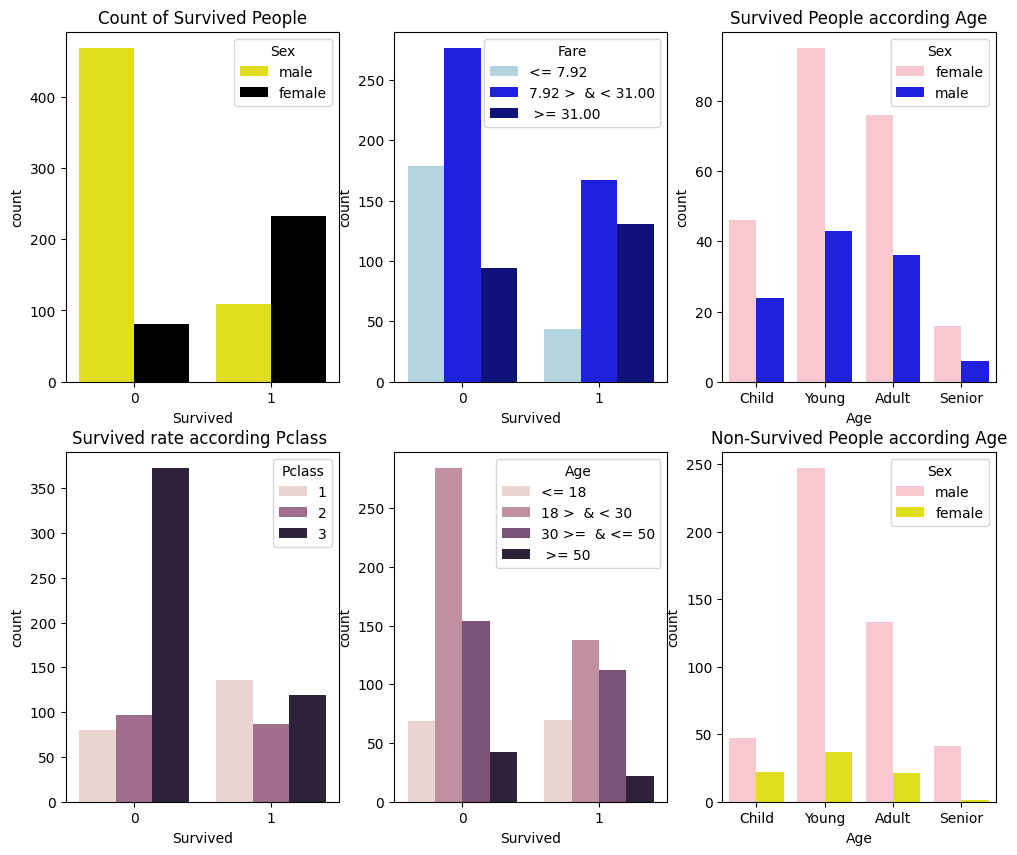

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(12, 10))
sns.countplot(x = df["Survived"], hue = df["Sex"], hue_order =  ["male" , "female"],ax= axs[0 ,0] ,legend = "full", palette = ["Yellow" , "Black"] , orient= "y")
axs[0 , 0 ].set_title("Count of Survived People")
sns.countplot(x = df["Survived"]  , hue = df["Pclass"], ax= axs[1 ,0])
axs[1 , 0 ].set_title("Survived rate according Pclass ")
sns.countplot(x = df["Survived"] , hue = df["Fare"] , palette = ["LightBlue","Blue","DarkBlue" ], ax= axs[0 ,1])
axs[0 , 1 ].legend(title = "Fare" , labels=["<= 7.92", "7.92 >  & < 31.00", " >= 31.00"])
sns.countplot(x = df["Survived"], hue = df["Age"], ax = axs[1 ,1])
axs[1 , 1 ].legend(title = "Age" , labels=["<= 18 ", "18 >  & < 30", "30 >=  & <= 50", " >= 50"])
sns.countplot(x="Age", hue="Sex", data=df[df["Survived"] == 1], palette={"male": "blue", "female": "pink"}, ax = axs[0,2] )
axs[0 , 2 ].set_title("Survived People according Age")
new_labels = ['Child', 'Young', 'Adult', 'Senior']
axs[0, 2].set_xticklabels(new_labels)
axs[0, 2].set_xticklabels(new_labels)
sns.countplot(x="Age", hue="Sex", data=df[df["Survived"] == 0], palette={"male": "pink", "female": "yellow"},ax = axs[1,2] )
axs[1 , 2 ].set_title("Non-Survived People according Age")
axs[1, 2].set_xticks(range(len(new_labels)))
axs[1, 2].set_xticklabels(new_labels)

In [ ]:
df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [ ]:
df["Embarked"].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

df.replace({"Sex" : {"male" : 0 , "female" :  1}} , {"Embarked" : {"S" : 0 , "C" : 1 , "Q" : 2}})

In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,young_adult,1,0,A/5 21171,Low,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Middle_adult,1,0,PC 17599,High,C
2,3,1,3,"Heikkinen, Miss. Laina",female,young_adult,0,0,STON/O2. 3101282,Medium,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Middle_adult,1,0,113803,High,S
4,5,0,3,"Allen, Mr. William Henry",male,Middle_adult,0,0,373450,Medium,S


In [ ]:
x = df.drop( columns = ["PassengerId", "Survived","Name" ,"Ticket"] , axis = 1)
y = df.iloc[ : , 1]
x ,y

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
oe = OrdinalEncoder(categories= [["female" , "male"] , ["Q","C", "S"]])

In [ ]:
oe.fit(df.loc[ : , ["Sex" ,"Embarked"]])

OrdinalEncoder(categories=[['female', 'male'], ['Q', 'C', 'S']])

In [ ]:
x = df.loc[ : , ["Sex" ,"Embarked"] ]

In [ ]:
x = oe.transform(x)
x

array([[1., 2.],
       [0., 1.],
       [0., 2.],
       ...,
       [0., 2.],
       [1., 1.],
       [1., 0.]])

In [ ]:
additional_df = pd.DataFrame(x , columns = ["Sex" , "Embarked"])
additional_df

,Sex,Embarked
0,1.0,2.0
1,0.0,1.0
2,0.0,2.0
3,0.0,2.0
4,1.0,2.0
...,...,...
886,1.0,2.0
887,0.0,2.0
888,0.0,2.0
889,1.0,1.0


In [ ]:
df.drop(columns = ["Sex" , "Embarked"] , inplace = True)

In [ ]:
df = pd.concat([df , additional_df ] , axis  = 1)

In [ ]:
df.drop(columns= ["PassengerId", "Name", "Ticket"] , inplace= True)

In [ ]:
df["Embarked"].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [ ]:
df[df["Survived"] == 1]["Embarked"].value_counts()

Embarked
S    219
C     93
Q     30
Name: count, dtype: int64

In [ ]:
Embarked_S = df[(df["Survived"] == 1) & (df["Embarked"] == 'S')].shape[0] / df["Embarked"].value_counts()[0]
Embarked_S

0.33900928792569657

In [ ]:
Embarked_C = df[(df["Survived"] == 1) & (df["Embarked"] == "C")].shape[0] / df["Embarked"].value_counts()[1]
Embarked_C

0.5535714285714286

In [ ]:
Embarked_Q = df[(df["Survived"] == 1) & (df["Embarked"] == 'Q')].shape[0] / df["Embarked"].value_counts()[2]
Embarked_Q

0.38961038961038963

In [ ]:
df[df["Survived"] == 1]["Embarked"].value_counts()

Embarked
S    219
C     93
Q     30
Name: count, dtype: int64

In [ ]:
df[(df["Survived"] == 0) & (df["Embarked"] == "S")].shape[0]

427

In [ ]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,young_adult,1,0,Low,S
1,1,1,female,Middle_adult,1,0,High,C
2,1,3,female,young_adult,0,0,Medium,S


In [ ]:
x = df.drop( columns = ["PassengerId", "Survived","Name" ,"Ticket"] , axis = 1)
y = df.iloc[ : , 1]
x ,y

(     Pclass  Age  SibSp  Parch     Fare  Sex  Embarked
 0         3   22      1      0   7.2500  1.0       2.0
 1         1   38      1      0  71.2833  0.0       1.0
 2         3   26      0      0   7.9250  0.0       2.0
 3         1   35      1      0  53.1000  0.0       2.0
 4         3   35      0      0   8.0500  1.0       2.0
 ..      ...  ...    ...    ...      ...  ...       ...
 886       2   27      0      0  13.0000  1.0       2.0
 887       1   19      0      0  30.0000  0.0       2.0
 888       3   29      1      2  23.4500  0.0       2.0
 889       1   26      0      0  30.0000  1.0       1.0
 890       3   32      0      0   7.7500  1.0       0.0
 
 [891 rows x 7 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64)

In [ ]:
df["Fare"] = df["Fare"].astype(object)
df["Age"] =df["Age"].astype(object)

In [ ]:
categorical_feature = df.select_dtypes(include = "object").columns.tolist()
categorical_feature

['Sex', 'Age', 'Fare', 'Embarked']

In [ ]:
df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,young_adult,1,0,Low,S


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df["Age"].unique()

array(['young_adult', 'Middle_adult', 'Old_adult', 'Children'],
      dtype=object)

In [ ]:
def evaluate_model_all(X,y):
  X_train , X_test, y_train, y_test = train_test_split(X , y , test_size = 0.2, random_state= 42)
  Columns_objects = categorical_feature

  models = [
      ("Logestic Regression" , LogisticRegression()),
      ("Support Vector Machine Classifier" , SVC()),
      ("Random Forest Classifier", RandomForestClassifier()),
      ("Gradient Bo0sting Classifier", GradientBoostingClassifier()),
      ("Decision Tree Classifier", DecisionTreeClassifier()),
      ("XGBoost Classifier", XGBClassifier()),
      ("LightGBM Regressor", LGBMClassifier()),
      ("KNeighbors Classifier", KNeighborsClassifier()),
  ]
  pipelines = {}
  for name, model in models :
    preprocessor = ColumnTransformer(
        transformers = [
            ("trf1", OneHotEncoder(), Columns_objects),
            ("trf2",OrdinalEncoder(categories=[["C", "Q", "S"],["young_adult","Middle_adult",'Old_adult', 'Children']]), ["Embarked" , "Age"]  )

        ],
        remainder = "passthrough"
   )



    pipeline = Pipeline(steps = [
      ("preprocessor", preprocessor),
      ("scalar" , StandardScaler()),
      (name , model),
    ])
    pipelines[name] = pipeline

  results = {}
  trained_models = {}
  for name, pipeline in pipelines.items():
    pipeline.fit(X_train , y_train)
    y_pred = pipeline.predict(X_test)
    confusion_mat = confusion_matrix(y_test, y_pred)
    Accuracy_Score = accuracy_score(y_test , y_pred)
    results[name] = {"Confusion_Mat" : confusion_mat , "Accuracy_Score" :Accuracy_Score }
    trained_models[name] = pipeline.named_steps[name]

  results_df = pd.DataFrame.from_dict(results, orient = "index").reset_index()
  results_df.rename(columns = {"index" : "Model"}, inplace = True)

  return results_df







In [ ]:
X = df.drop(["Survived"] , axis = 1)
y = df["Survived"]
evaluate_model_all(X,y)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000281 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 65
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,Model,Confusion_Mat,Accuracy_Score
0,Logestic Regression,"[[87, 18], [20, 54]]",0.787709
1,Support Vector Machine Classifier,"[[89, 16], [21, 53]]",0.793296
2,Random Forest Classifier,"[[90, 15], [16, 58]]",0.826816
3,Gradient Bo0sting Classifier,"[[92, 13], [21, 53]]",0.810056
4,Decision Tree Classifier,"[[92, 13], [20, 54]]",0.815642
5,XGBoost Classifier,"[[93, 12], [14, 60]]",0.854749
6,LightGBM Regressor,"[[93, 12], [18, 56]]",0.832402
7,KNeighbors Classifier,"[[86, 19], [19, 55]]",0.787709
